In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def particle_swarm_optimizer(n, cost, boundaries, N = 1000, W_lims = [0.9, 0.4], c1=2, c2 = 2):
    '''
    n: number of agents
    cost: The cost function
    boundaries: Bounds on solution space parameters
    N: Number of iterations, default set to 1000
    W_lims: The upper and lower limit of the acceleration weight
    c1, c2: Constants
    '''
    W = np.linspace(W_lims[0], W_lims[1], N)
    
    # Dimension of solution space
    D = np.shape(boundaries)[0]

    # Data arrays
    gb_arr = np.empty((N, D))
    cost_arr = []
    p_arr = np.empty((N, n, D))

    # Instantiate position of agents
    P = np.empty((n, D))
    # Personal best
    Pb = np.empty((n, D))
    
    # Instantiate velocities of agents
    v = np.empty((n, D))

    # Instantiating Pb and P
    for j in range(n):
        for k in range(D):
            delta = boundaries[k][1] - boundaries[k][0] 
            P[j][k] = np.random.rand()*delta + boundaries[k][0]
            Pb[j][k] = P[j][k]
            
            # Instantiating v to random values
            v[j][k] = np.random.rand()*2*delta - delta
    
    # Goes over all iterations
    for i in range(N):
        
        # Computes cost for each agent
        costs = [cost(P[l]) for l in range(n)]
        
        # Gets global best agent (minimum cost)
        Gb_idx = np.argmin(costs)
        Gb = P[Gb_idx]
        
        # Update velocities
        for j in range(n):
            
            # This velcority formula is from a book
            v[j] = W[i]*v[j] + c1*np.random.rand()*(Pb[j] - P[j]) + c2*np.random.rand()*((Gb - P[j]))
            
            # Updates agent position depending on the velocity and clips it to the boundaries
            P[j] = v[j] + P[j]
            for k in range(D):
                P[j][k] = np.clip(P[j][k], boundaries[k][0], boundaries[k][1])
            
            # Compare P[j] with Pb[j]
            if cost(P[j])<cost(Pb[j]):
                Pb[j] = P[j]
                
        # Update the resulting data arrays
        gb_arr[i] = Gb
        cost_arr.append(costs[Gb_idx])
        p_arr[i] = P   
    
    return gb_arr, p_arr, cost_arr

In [3]:
def cost(params):
    return (params[0] - 3.14)**2 + (params[1] - 2.72)**2 + np.sin(3*params[0] + .41) + np.sin(4*params[1] - 1.73)

In [4]:
n_agents = 10
n_iterations = 250
cost_fn = cost
lower_bound = 0
upper_bound = 5
boundaries = np.array([[lower_bound, upper_bound], [lower_bound, upper_bound]])

gb_arr, p_arr, cost_arr = particle_swarm_optimizer(n_agents, cost_fn, boundaries, n_iterations) 
print('The optimal solution: ', gb_arr[-1])
print('Cost of the optimal solution:', cost_arr[-1])

The optimal solution:  [3.45744429 3.12980279]
Cost of the optimal solution: -1.6874234553980059


/Users/diogovenancio/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diogovenancio/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diogovenancio/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diogovenancio/.pyenv/versions/3.11.1/

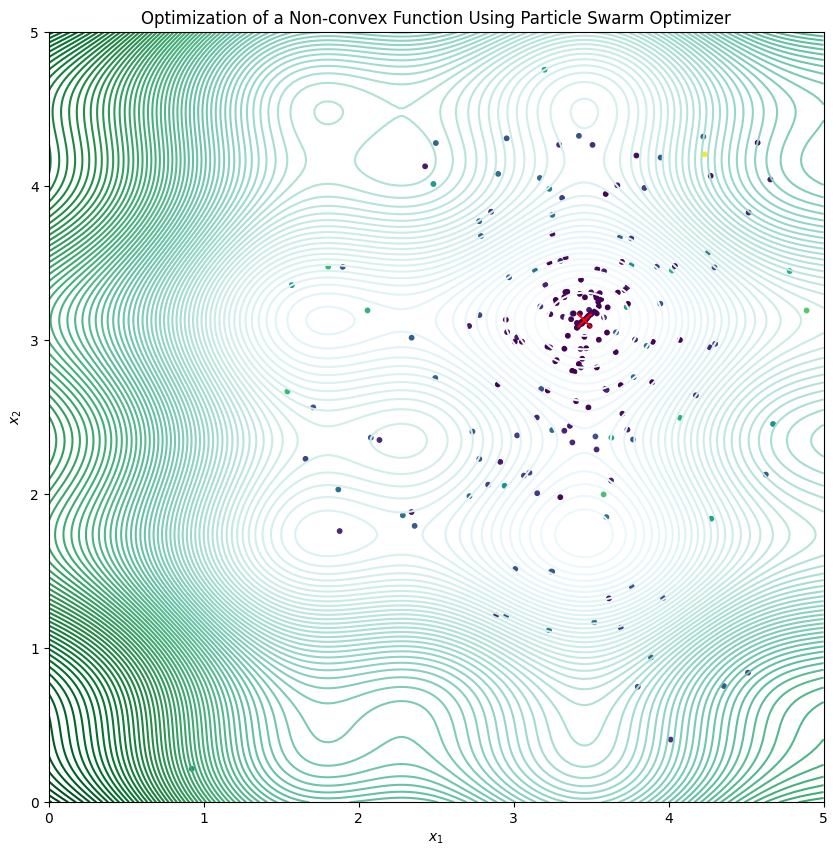

In [5]:
# Data array
n = 200
x1 = np.linspace(0, 5, n)
x2 = np.linspace(0, 5, n)
# Grid of elements
X, Y = np.meshgrid(x1, x2)
# Cost function on grid
z = []
for y in Y:
    for x in X[0]:
        z.append(cost([x, y[0]]))
Z = np.reshape(z, (n, n))

# #Plotting the cost function of grid
fig = plt.figure(figsize = (10, 10))
plt.contour(X, Y, Z, cmap = 'BuGn', levels = 100)

# Plotting the optimization result
opt_arr = np.mean(p_arr, axis = 1)
param1, param2 = np.split(opt_arr, 2, axis = 1)
plt.scatter(param1, param2, c = cost_arr, s = 10, marker = 'o')

# Plotting the global minimum
plt.scatter(param1[-1], param2[-1], c = 'red', s = 100, marker = 'x')

# # Set labels
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Optimization of a Non-convex Function Using Particle Swarm Optimizer')  

plt.show()    

In [7]:
%matplotlib notebook

bounds = [[0, 5], [0, 5]]
levels = 100
[X, Y] = np.meshgrid(np.linspace(bounds[0][0], bounds[0][1], levels), np.linspace(bounds[1][0], bounds[1][1], levels))
Z = cost([X, Y])

fig = plt.figure(figsize = (7, 7))
plt.contour(X, Y, Z, levels)
gb, = plt.plot(gb_arr[0][0], gb_arr[0][0], 'ro', linestyle = '', markersize = 10)

p1, p2 = np.array_split(p_arr[0], 2, axis=1)
p,  = plt.plot(p1, p2, 'bx', linestyle = '', markersize = 5)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Motion of Agents in Particle Swarm Optimizer')  

def update(i, p, gb):
    gb.set_data(gb_arr[i][0], gb_arr[i][1])

    p1, p2 = np.array_split(p_arr[i], 2, axis=1)
    p.set_data(p1, p2)

    return p, gb,

anim = animation.FuncAnimation(fig, update, 2000, fargs = (p, gb), interval = 500,  blit=True, repeat=False)
plt.show()

<IPython.core.display.Javascript object>